<a href="https://colab.research.google.com/github/anniepeacock/DANSAR/blob/devel/Wetland_Inundation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SAR Application: Wetland Inundation

### I. How to create SAR quicklook images over inundated areas?
* Useful Products: PolSAR HH and HV. If possible also VV. HH, HV, VV power (backscatter)
* Relevant Sensors: UAVSAR, Sentinel-1, ALOS, JERS-1, ERS, TandemX
* Instructions to View: Pauli decomposition for quad-pol or HH/HV, VV/VH for dual-pol images
* Qualitative Browse Product: Flood area extend; flooded grasses vs. flooded trees vs. open water; number of flood days

### II. How to interpret L-Band SAR images over inundated areas?
Co-pol signal is relatively stronger in inundated areas owing to double-bounce. L-band brightness increases over flooded forests and tall vegetation. Short vegetation and open water are dark.

The Pauli color coding is based on a vector representation of linear combinations of scattering matrix elements. The resulting polarimetric channels HH+VV , HH-VV , HV are then associated to the blue, red and green colors respectively.

- Water appears blue on the image. This indicates that the first polarimetric channel, HH+VV, magnitude large compared to others, i.e. the amplitude of HV is weak and the phase argument of HHVV* is close to zero. This is characteristic of scattering over a surface.
 
- Over forested areas, the green color indicates a dominant HV component, generally characteristic of vegetated zones.
- Over the built up areas, the dominant colors are white and red. White pixels correspond to equal amplitude over all polarimetric channels, whereas red indicates that the phase argument of HHVV* is close to π, and denote a wave double bounce reflection.


Uninhabited Aerial Vehicle Synthetic Aperture Radar (UAVSAR) is an L-Band airborne radar instrument mounted on NASA's C-20A research aircraft. The overlay of different polarization channels allows users to visually classify a scene by its backscattering mechanism, such as surface scattering (strong HH and VV return), volume scattering (strong HV return) and double-bounce scattering (strong HH return). Thus in RGB images, areas dominated by green (HV) intensity are typically vegetated areas. Areas dominated by shades of pink (HH+HV) intensity are typically inundated forests, vegetated fields, or urban areas. Black and dark grey areas are usually smooth surfaces (roads, open water, smooth bare ground) where there is little radar backscatter.  

## UAVSAR Inundation Extent Examples
Bonanza Creek, Alaska - Pauli Decomposition RGB Comparison
Marsh Island, Louisiana - Pauli Decomposition RGB Comparison
Corcovado Lagoon and Sierpe mangroves, Costa Rica - Pauli Decomposition RGB Comparison

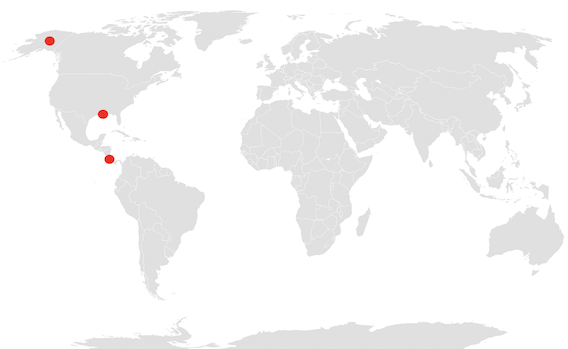

1. [Running the Notebook](#s1)
2. [Bonanza Creek, Alaska](#s2)
3. [Marsh Island, Louisiana](#s3)
4. [Corcovado Lagoon and Sierpe mangroves, Costa Rica](#s4)

<a name="s1"></a>
## 1. Running the Notebook

- To run the content, **select the play button** in the upper left corner of each code cell or **press shift-enter**. 

### Python Packages:
This routine using the following python libaries. Some are already included in the Google Colab environment and others are installed in the cell below before imported.

In [ ]:
import ipywidgets as widgets
from ipywidgets import AppLayout, Button, Layout, HTML
from ipyleaflet import (Map, basemaps, basemap_to_tiles, SplitMapControl, ImageOverlay,
                        projections, LayersControl, FullScreenControl, LocalTileLayer)
from pathlib import Path
from typing import *
import os
from traitlets import Bool

In [ ]:
# # Image Slideshow Inputs
# image_path = "/Pictures"
# image_type = "png"
# title = "Hurricane Florence Flooding over Peedee River, South Carolina"
# subtitle = "UAVSAR Line Peedee_15100"

# # Interactive Map Inputs
# ssurge = "ssurge16/{z}/{x}/{y}.png"
# lamarsh = "lamarsh10/{z}/{x}/{y}.png"
# redwod = "redwod09/{z}/{x}/{y}.png"
# corcov = "corcov10/{z}/{x}/{y}.png"

<a name="s2"></a>
## 2. Bonanza Creek, Alaska

UAVSAR line Bonanza Creek wetlands near Fairbanks Alaska: bonanE_03604_19064_004_190914_L090_CX_01

This collection of UAVSAR acquisitions shows changing inundation. Inundated vegetation appears pink and higher flooding of fields appears darker purple, almost black. 

In [ ]:
# %%HTML

# <!DOCTYPE html>
# <html>
# <title>W3.CSS</title>
# <meta name="viewport" content="width=device-width, initial-scale=1">
# <link rel="stylesheet" href="https://www.w3schools.com/w3css/4/w3.css">
# <style>
# .python-iframe > iframe {
#   height:1000px !important;
# }
# .mySlides {display:none;}
# </style>
# <body>

# <div class="w3-container">
#   <h2>UAVSAR Pauli Decomposition RGB Images Bonanza Creek</h2>
#   <p> </p>
# </div>

# <div class="w3-content w3-display-container">

# <div class="w3-display-container mySlides">
#   <img src="./Pictures/bonanE_170616_cropped.tif" style="width:100%">
#   <div class="w3-display-bottomleft w3-large w3-container w3-padding-16 w3-black">
#     06/16/2017
#   </div>
# </div>

# <div class="w3-display-container mySlides">
#   <img src="./Pictures/bonanE_170919_clipped.tif" style="width:100%">
#   <div class="w3-display-bottomleft w3-large w3-container w3-padding-16 w3-black">
#    09/19/2017
#   </div>
# </div>

# <div class="w3-display-container mySlides">
#   <img src="./Pictures/bonanE_180827_clipped.tif" style="width:100%">
#   <div class="w3-display-bottomleft w3-large w3-container w3-padding-16 w3-black">
#     08/7/2018
#   </div>
# </div>

# <div class="w3-display-container mySlides">
#   <img src="./Pictures/bonanE_190913_cropped.tif" style="width:100%">
#   <div class="w3-display-bottomleft w3-large w3-container w3-padding-16 w3-black">
#     09/13/2019
#   </div>
# </div>


# <button class="w3-button w3-display-left w3-black" onclick="plusDivs(-1)">&#10094;</button>
# <button class="w3-button w3-display-right w3-black" onclick="plusDivs(1)">&#10095;</button>

# </div>

# <script>
# var slideIndex = 1;
# showDivs(slideIndex);

# function plusDivs(n) {
#   showDivs(slideIndex += n);
# }

# function showDivs(n) {
#   var i;
#   var x = document.getElementsByClassName("mySlides");
#   if (n > x.length) {slideIndex = 1}
#   if (n < 1) {slideIndex = x.length}
#   for (i = 0; i < x.length; i++) {
#      x[i].style.display = "none";  
#   }
#   x[slideIndex-1].style.display = "block";  
# }
# </script>

# </body>
# </html>

In [ ]:
# Installs geemap package
import subprocess

try:
    import geemap
except ImportError:
    print('geemap package not installed. Installing ...')
    subprocess.check_call(["python", '-m', 'pip', 'install', '-U', 'geemap'])

from ipyleaflet import (Map, basemaps, basemap_to_tiles, SplitMapControl, ImageOverlay, ScaleControl,
                        projections, LayersControl, FullScreenControl, LocalTileLayer, LegendControl, Marker, CircleMarker)

geemap package not installed. Installing ...


In [ ]:
import geemap
import ee

import ipywidgets as widgets
from ipywidgets import AppLayout, Button, Layout, HTML
from pathlib import Path
from typing import *
import os
from traitlets import Bool

# from ipyleaflet import Map, basemaps, basemap_to_tiles, LegendControl

# class CustomLocalLayer(LocalTileLayer):
#     tms = Bool(True).tag(sync=True, o=True)

<a name="s3"></a>
## 3. Marsh Island, Louisiana
UAVSAR line LAmrsh_27906_10054_008_100624_L090_CX_01

In [ ]:
m = Map(basemap=basemap_to_tiles(basemaps.Esri.WorldImagery),
    center=(29.67, -92.63),
    zoom=10
    
)

collection = ee.ImageCollection("users/annemariepeacock/uavsar")
print(collection.aggregate_array('system:id').getInfo())
panama_HH = ee.Image('users/annemariepeacock/uavsar/PCanal_31504_10017_010_100206_L090HHHH_CX_02_cropped')
panama_VV = ee.Image('users/annemariepeacock/uavsar/PCanal_31504_10017_010_100206_L090VVVV_CX_02_cropped')
left_layer = geemap.ee_tile_layer(panama_HH, {'min': 0,'max': 0.1,'palette': ['#FFFFFF','#0096FF', '#0047AB']}, 'HH')
right_layer = geemap.ee_tile_layer(panama_VV, {'min': 0,'max': 0.1,'palette': ['#FFFFFF','#0096FF','#0047AB']}, 'VV')

# layer1 = basemap_to_tiles(basemaps.Esri.WorldImagery)
# layer2 = CustomLocalLayer(tms=True, path=lamarsh, name="Marsh Island, Louisiana")

## Ipyleaflet Controls
control = SplitMapControl(left_layer=layer1, right_layer=layer2)
legend = LegendControl({"HH-VV (Double Bounce)":"#FF0000", "HV+VH (Volume Scattering)":"#008000", "HH+VV (Specular Scattering)":"#0000FF"}, name="RGB Channels", position="topright")
description = LegendControl({"Flooded or bare ground":"#261947", "Flooded Vegetation":"#e8cef5", "Vegetation":"#7eab91"}, name="Interpretation", position="topright")
m.add_control(legend)
m.add_control(description)
m.add_control(control)
m.add_control(LayersControl())
m.add_control(FullScreenControl())

m

NameError: ignored

<a name="s4"></a>
## 4. Corcovado Lagoon and Sierpe mangroves, Costa Rica
UAVSAR line corcov_36026_10019_007_100210_L090_CX_01

In [ ]:
m = Map(basemap=basemap_to_tiles(basemaps.Esri.WorldImagery),
    center=(8.9, -83.7),
    zoom=11
    
)
layer1 = basemap_to_tiles(basemaps.Esri.WorldImagery)
layer2 = CustomLocalLayer(tms=True, path=corcov, name="Corcovado Lagoon and Sierpe mangroves Costa Rica")

## Ipyleaflet Controls
control = SplitMapControl(left_layer=layer1, right_layer=layer2)
legend = LegendControl({"HH-VV (Double Bounce)":"#FF0000", "HV+VH (Volume Scattering)":"#008000", "HH+VV (Specular Scattering)":"#0000FF"}, name="RGB Channels", position="topright")
description = LegendControl({"Flooded or bare ground":"#261947", "Flooded Vegetation":"#e8cef5", "Vegetation":"#7eab91"}, name="Interpretation", position="topright")
m.add_control(legend)
m.add_control(description)
m.add_control(control)
m.add_control(LayersControl())
m.add_control(FullScreenControl())

m

Map(center=[8.9, -83.7], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out…

## Other Resources

## References

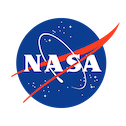

The research was carried out at the Jet Propulsion Laboratory, California Institute of Technology, under a contract with the National Aeronautics and Space Administration (80NM0018D0004)

© 2020. California Institute of Technology. Government sponsorship acknowledged. 